In [1]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
from scipy.stats import expon, anderson, probplot, sem
import math

import matplotlib.pyplot as plt

from copy import deepcopy

import pickle

In [6]:
# r_n function
def r(n, D):
    return (n ** (-1/(2*D))) / 10
    # designed for n = 10^6

In [3]:
n = 1000000
D = 2

x_init = np.array([0.1, 0.1])
x_goal = np.array([0.9, 0.9])

In [4]:
distances = []
S_n = []
counts = []

#g = open('slurm scripts/data/06-24-20/asymptotics-dim2_n50000.out', 'r')
#for line in g:
#    distances.append(float(line))

filename = 'slurm scripts/data/07-06-20/path_points/'
for i in range(1,501):
    #if distances[i] == float('inf'):
    #    S_n.append(float('inf'))
    #    continue
    f = open(filename+str(i)+'-dim2-n1000000_pathpoints.pkl', "rb")
    pathpoints = pickle.load(f)
    s_n = 0
    for j in range(len(pathpoints)-2):
        s_n += np.linalg.norm(pathpoints[j+1] - pathpoints[j])
    S_n.append(s_n)
    distances.append(s_n + np.linalg.norm(pathpoints[-1] - pathpoints[-2]))
    counts.append(len(pathpoints)-2)
    
    if pathpoints[-1][0] != 0.9 or pathpoints[-1][1] != 0.9:
        print(i)

        
distances = np.array(distances)
S_n = np.array(S_n)
counts = np.array(counts)

In [48]:
edge_lengths = []
angle_displacements = []
for i in range(1, 501):
    f = open(filename+str(i)+'-dim2-n1000000_pathpoints.pkl', "rb")
    pathpoints = pickle.load(f)
    for j in range(len(pathpoints)-2):
        edge_lengths.append(np.linalg.norm(pathpoints[j+1] - pathpoints[j]))
        
        #if j == len(pathpoints)-3:
        #    continue
        
        vect_1 = pathpoints[j+1] - pathpoints[j]
        vect_2 = x_goal - pathpoints[j]
        angle = math.atan2( vect_1[0]*vect_2[1] - vect_1[1]*vect_2[0], vect_1[0]*vect_2[0] + vect_1[1]*vect_2[1])
        angle_displacements.append(angle)
        
edge_lengths = np.array(edge_lengths)
angle_displacements = np.array(angle_displacements)

(array([   31.,    99.,   204.,   318.,   455.,   553.,   690.,   839.,
         1018.,  1241.,  1383.,  1522.,  1717.,  1924.,  2153.,  2386.,
         2676.,  2858.,  3208.,  3309.,  3662.,  4003.,  4252.,  4411.,
         4734.,  5090.,  5277.,  5476.,  5999.,  6094.,  6507.,  6647.,
         6818.,  7269.,  7537.,  7780.,  7985.,  8385.,  8592.,  9124.,
         9152.,  9417.,  9776.,  9928., 10391., 10616., 10684., 10819.,
        11202., 11535.]),
 array([1.65547906e-06, 6.48678483e-05, 1.28080218e-04, 1.91292587e-04,
        2.54504956e-04, 3.17717325e-04, 3.80929695e-04, 4.44142064e-04,
        5.07354433e-04, 5.70566802e-04, 6.33779172e-04, 6.96991541e-04,
        7.60203910e-04, 8.23416279e-04, 8.86628649e-04, 9.49841018e-04,
        1.01305339e-03, 1.07626576e-03, 1.13947813e-03, 1.20269049e-03,
        1.26590286e-03, 1.32911523e-03, 1.39232760e-03, 1.45553997e-03,
        1.51875234e-03, 1.58196471e-03, 1.64517708e-03, 1.70838945e-03,
        1.77160182e-03, 1.83481419e-03

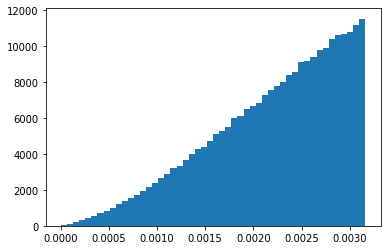

In [52]:
plt.hist(edge_lengths, bins = 50)

In [14]:
max(set(counts)) - min(set(counts))

40

Text(0.5, 1.0, '40 bins')

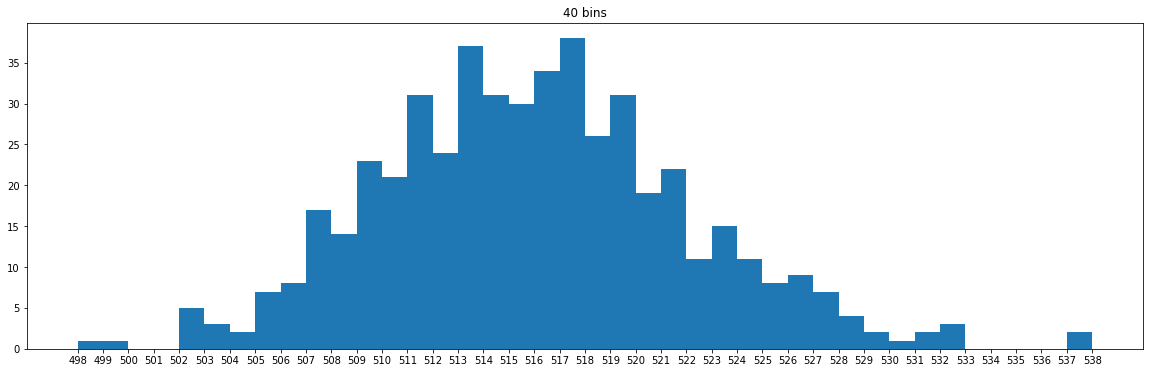

In [15]:
num = 40
plt.figure(figsize=(20, 6))
plt.hist(counts, range(498, 539))
plt.xticks(range(498, 539))
plt.title(str(num) + ' bins')

In [56]:
np.std(counts) ** 2

37.017935999999985

In [16]:
500 in counts

False

In [17]:
( r(n,D) ** 2) * math.pi * n

31.41592653589792

In [18]:
T = (0.8 * (2 ** 0.5)) / (2/3 * r(n,D)) * math.cos(math.pi / 31.41592653589792)
print(T)

533.9752683497045


In [22]:
(1/18) * (r(n, D) ** 2) * ((0.8 * (2 ** 0.5)) / (2/3 * r(n,D)) ** 2)

0.14142135623730953

In [21]:
(1/18) * (r(n, D) ** 2) * (T ** 2)

0.15840532622729936

In [23]:
# empirical variance

np.std((S_n) * (np.sqrt(counts))) ** 2

0.027634847846733288

In [19]:
# our approximation

(1/18) * (r(n, D) ** 2) * np.mean(counts ** 2)

0.14764945555555553

In [53]:
# variance of tilde(X)_ni

(1/18) * (r(n, D) ** 2)

5.555555555555554e-07

In [54]:
# empirical variance of R_ni

np.std(edge_lengths) ** 2

4.6694817793174623e-07

In [55]:
# using empirical variance of R_ni in our approximation for empirical variance of S_n sqrt(T_n)

(np.std(edge_lengths) ** 2) * np.mean(counts ** 2)

# lower (and closer!), but still a long way to go

0.12410035963970584

In [34]:
lengths = deepcopy(S_n)
lengths = lengths - ((counts) * (2/3) * r(n,D))
#lengths /= ((T) * (2/3) * r(n,D))
lengths = lengths * np.sqrt(counts)

np.std(lengths) ** 2

0.07689388731124445

In [29]:
lengths = deepcopy(S_n)
lengths = lengths - ((T) * (2/3) * r(n,D))
#lengths /= ((T) * (2/3) * r(n,D))
lengths = lengths * (T ** (1/2))

np.std(lengths) ** 2

0.001431507574712072